In [1]:
import requests as req

In [2]:
from bs4 import BeautifulSoup as bs

In [3]:
import pandas as pd

In [5]:
import wordcloud

In [6]:
import matplotlib.pyplot as plt


In [ ]:
#url = "https://reviews.webmd.com/drugs/drugreview-841-atorvastatin-oral?conditionid=&sortval=1&page=1&next_page=true"


In [ ]:
# res = req.get(url)
# soup = bs(res.content , 'lxml')
# #print(soup)

In [5]:
# Initialize an empty list to store BeautifulSoup objects for all pages
all_page_contents = []

In [6]:
# Iterate through pages 1 to 10
for r in range(1, 11):
    # Construct the URL for the current page
    url = f"https://reviews.webmd.com/drugs/drugreview-841-atorvastatin-oral?conditionid=&sortval=1&page={r}&next_page=true"

    # Send an HTTP GET request to the URL
    response = req.get(url)

    # Create a BeautifulSoup object to parse the page content
    one_page_content = bs(response.content, 'lxml')

    # Append the BeautifulSoup object to the list
    all_page_contents.append(one_page_content)

# Print the total number of BeautifulSoup objects collected (should be 10)
print(len(all_page_contents))



10


In [ ]:
# # Create an empty list to store data.
# data = []

# # Create a BeautifulSoup object to parse the HTML
# soup = bs(all_page_contents,'html.parser')

# # Find all <div> elements with the class "review-details"
# result = soup.find_all("div", class_="review-details")

# # Loop through the first 20 "review-details" elements found by 'find_all'
# for review in result[:20]:
#     # Extract the text content of each element and append it to the 'data' list
#     data.append(review.text)

# # Print the length of the 'data' list, which represents the number of elements collected (maximum 20).
# print(len(data))



TypeError: ignored

In [ ]:
# pages = []
# for result in all_page_contents:
#   result = soup.find_all("div", class_="review-details")
#   if result.


In [10]:
#Create an empty list to store data.
#Create an empty list to store data.
data = []

# Find all <div> elements with the class "shared-reviews-container" within 'all_page_contents' HTML.
page_all = []

for page in all_page_contents:
    page_all.append(page.find_all("div", class_="shared-reviews-container"))

# page_all = all_page_contents.find_all("div", class_="shared-reviews-container")

# Loop through the elements found by 'find_all'.
for res_set in page_all:
    for container in res_set:
        # Find the first <div> element with the class "review-details-holder" within each 'container'.
        page_all_div = container.find("div", class_="review-details-holder")

        # Check if 'page_all_div' is not None before proceeding.
        if page_all_div:
            # Find the first <div> element with the class "review-details" within 'page_all_div'.
            page = page_all_div.find("div", class_="review-details")

            # Check if 'page' is not None before extracting text.
            if page:
                # Extract text content and append it to the 'data' list.
                data.append(page.text)

# Print the 'data' list containing the text content of the first 20 elements.
print(data[:20])




[" Anonymous |   45-54 |   Male |   On medication for 1 to 6 months |   Patient   8/25/2023  Condition: Treatment to Prevent a Heart Attack  Overall rating 2.7 EffectivenessEase of UseSatisfactionThe reviews are insightful, but I'd love to read more about the recovery time.  We're all writing at the time of our pain, but there is very limited information on the time frames for recovery.  For me, I started at 80mg of Atorvastatin right after a stent placement.  It wasn't until 5 months later that I experienced horrible joint pain that kept moving throughout my body.  It was to the point that it kept me up all night.\n\nOne month later after stopping taking the drug, I'm still dealing with horrible shoulder pain, but it seems to be getting better; but very slowly.  My wrist has experienced excruciating pain and is finally getting better; I can make a fist.  My shoulders, I couldn't even lift my arms without feeling excruciating pain.  Now, I'm still in pain, but I can lift arms slightly 

In [ ]:

# # Example HTML string (replace this with your actual HTML content)
# html_string = """
# <html>
#     <body>
#         <div class="shared-reviews-container">Review 1</div>
#         <div class="shared-reviews-container">Review 2</div>
#         <div class="shared-reviews-container">Review 3</div>
#     </body>
# </html>
# """

# # Create a BeautifulSoup object from the HTML string
# all_page_contents = BeautifulSoup(html_string, "html.parser")

# Now, you can use find_all on the BeautifulSoup object
# page_all = all_page_contents.find_all("div", class_="shared-reviews-container")

# # Loop through the elements found by 'find_all'.
# for container in page_all:
#     print(container.text)


In [11]:
# Initialize an empty list to store condition details from each page
page_details = []


In [12]:

# Initialize an empty list to store page details
page_details = []

# Assuming you have a 'result' list containing pages as BeautifulSoup objects

# Iterate through each page's content in the 'result' list
for page in result:
    # Find the first <strong> element with the class "condition" on the current page
    condition = page.find("strong", class_="condition")

    # Check if the 'condition' element was found on the current page
    if condition is not None:
        # Append the text content of the 'condition' element to 'page_details'
        page_details.append(condition.text)
    else:
        # Handle the case where 'condition' element was not found (optional)
        page_details.append("Condition not found on this page")

# After the loop, 'page_details' should contain the condition details from all pages
print(len(page_details))






NameError: name 'result' is not defined

In [ ]:
# save the data csv
files = {'condition':page_details,}
file = pd.DataFrame(files).to_csv('drugs.csv')


In [ ]:

# Create a Python dictionary with a key "condition" and a value (e.g., a string)
#data = {"condition": "some_value"}

# Convert the dictionary to a JSON string
json_data = json.dumps(files)

# Now, json_data contains the JSON representation of the dictionary


In [ ]:
word = wordcloud.WordCloud(width=800, height=400, background_color='pink').generate(json_data)


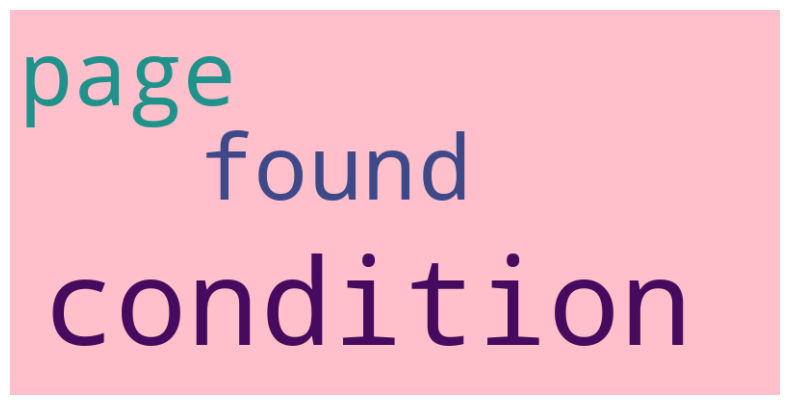

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.show()